## Data Wrangling and Cleaning, Part 2

In Part 1, I dealt with the missing values in the autos dataset using several different methods.  In this notebook, I will continue the wrangling process by doing the following steps:
 - making sure the data are the correct data type
 - standardizing units
 - normalizing data ranges
 - binning variable for grouped analysis
 - creating dummy variables for categorical features
    
First, I will start by importing the datafile from the last notebook.

In [2]:
import pandas as pd

In [3]:
autos_df2=pd.read_csv("autos_missing_fixed.csv")
autos_df2.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


Now I will inspect the data types for each column:

In [4]:
autos_df2.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

Obviously, some of the columns are the wrong data type.  For instance, horsepower and peak rpm are type _object_ but should really be a numerical data type like _float_ or _int_.  I will correct the wrong ones with the _astype_ method.

In [7]:
autos_df2[["normalized-losses", "horsepower"]] = autos_df2[["normalized-losses", "horsepower"]].astype("int")
autos_df2[["peak-rpm", "price"]] = autos_df2[["peak-rpm", "price"]].astype("float")
autos_df2[["bore", "stroke"]] = autos_df2[["bore", "stroke"]].astype("float")

Now I can do some unit transformation and standardization.  For instance, the fuel efficiency measures in this dataset are in miles per gallon.  We might need to transform this to standard metric units for fuel efficiency, liters per 100 kilometers, using the relationship: _L/100 km = 235.215 / mpg_.

In [9]:
autos_df2['city-L/100km'] = 235.215 / autos_df2['city-mpg']
autos_df2['highway-L/100km'] = 235.215 / autos_df2['highway-mpg']
autos_df2.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.200714,8.711667
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.200714,8.711667
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.379737,9.046731
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.800625,7.840500
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.067500,10.691591


In [11]:
autos_df2.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'city-L/100km',
       'highway-L/100km'],
      dtype='object')

In [24]:
autos_df2['height'].max()

59.8

In [25]:
autos_df2['width'].max()

72.0

In [22]:
autos_df2['length'].max()

208.1

This isn't a great example of normalizing features, but I can at least demonstrate normalizing the _height, width, and length_ variables to be between 0 and 1, so that in any analysis done with those numbers the output wouldn't be unduly affected by the length being considerably larger in magnitude.

In [29]:
autos_df2['length_norm'] = autos_df2['length'] / autos_df2['length'].max()
autos_df2['width_norm'] = autos_df2['width'] / autos_df2['width'].max()
autos_df2['height_norm'] = autos_df2['height'] / autos_df2['height'].max()
autos_df2.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,length_norm,width_norm,height_norm
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,111,5000.0,21,27,13495.0,11.200714,8.711667,0.811148,0.890278,0.816054
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,111,5000.0,21,27,16500.0,11.200714,8.711667,0.811148,0.890278,0.816054
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,154,5000.0,19,26,16500.0,12.379737,9.046731,0.822681,0.909722,0.876254
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,102,5500.0,24,30,13950.0,9.800625,7.840500,0.848630,0.919444,0.908027
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,115,5500.0,18,22,17450.0,13.067500,10.691591,0.848630,0.922222,0.908027


Now the height, width, and length variables are all in the range of 0 to 1.

Next I can demonstrate how to bin a variable into more general groups of values I define.  I can bin the horsepower variable into low, medium, and high bins.

In [30]:
autos_df2["horsepower"].dtype

dtype('int32')

Horsepower is already the appropriate data type - integer.  So first I will plot the distribution of values in a histogram using the _matplotlib_ library.

Text(0.5, 1.0, 'Horsepower Histogram')

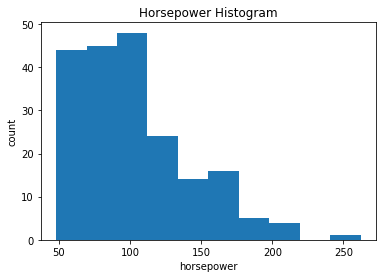

In [34]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(autos_df2["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("Horsepower Histogram")

We will use numpy's _linspace_ function to create the divider values for the bins and output them to an array called "bins".  Since we are creating three bins, we will need four dividers.  The bins will range from the minimum to maximum values of horsepower.

In [37]:
import numpy as np
bins = np.linspace(min(autos_df2['horsepower']), max(autos_df2['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Then I'll create names for each bin:

In [38]:
bin_names = ["Low", "Medium", "High"]

Then I will use the pandas _cut_ functipn to create the new binned categorical variable.

In [41]:
autos_df2["horsepower-binned"]= pd.cut(autos_df2["horsepower"], bins, labels=bin_names, include_lowest=True)
autos_df2["horsepower-binned"].head()

0       Low
1       Low
2    Medium
3       Low
4       Low
Name: horsepower-binned, dtype: category
Categories (3, object): [Low < Medium < High]

Then I can use the pandas _value counts_ method to count the number of instances of each bin.

In [42]:
autos_df2["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

<BarContainer object of 3 artists>

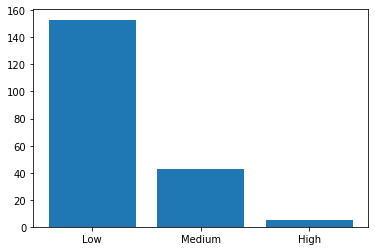

In [44]:
pyplot.bar(bin_names, autos_df2["horsepower-binned"].value_counts())

Lastly, I can convert the categorical variable _fuel-type_ into indicator or dummy variables which will be either a zero or a one for each fuel type, gasoline or diesel.  I will use the pandas _get dummies_ function to create a two-column dataframe with _diesel_ and _gas_ columns populated by either zeros or ones.

In [46]:
dummy_var = pd.get_dummies(autos_df2["fuel-type"])
dummy_var.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Then I can add the dummy variables back into the autos dataframe in case I want to use them for analysis.

In [49]:
autos_df2 = pd.concat([autos_df2, dummy_var], axis=1)
autos_df2.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,highway-mpg,price,city-L/100km,highway-L/100km,length_norm,width_norm,height_norm,horsepower-binned,diesel,gas
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,27,13495.0,11.200714,8.711667,0.811148,0.890278,0.816054,Low,0,1
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,27,16500.0,11.200714,8.711667,0.811148,0.890278,0.816054,Low,0,1
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,26,16500.0,12.379737,9.046731,0.822681,0.909722,0.876254,Medium,0,1
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,30,13950.0,9.800625,7.840500,0.848630,0.919444,0.908027,Low,0,1
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,22,17450.0,13.067500,10.691591,0.848630,0.922222,0.908027,Low,0,1


Then I will get rid of the _fuel-type_ column since I don't need it any more.

In [50]:
autos_df2.drop('fuel-type', axis=1, inplace=True)
autos_df2.columns

Index(['Unnamed: 0', 'symboling', 'normalized-losses', 'make', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'length_norm', 'width_norm', 'height_norm', 'horsepower-binned',
       'diesel', 'gas'],
      dtype='object')

That is it for the data preparation phase.  The next notebook will be devoted to exploratory data analysis using this same dataset.  So I will output the dataframe I have made in this notebook to a csv file that I can import for the next phase.

In [51]:
autos_df2.to_csv("autos_for_eda.csv")

#### See you in the next notebook!